<a href="https://colab.research.google.com/github/Narimaneker/YOLOv8-for-brain-tumor-detection/blob/main/object_detector_using_YOLO_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**data collection**
i downloaded the medical image dataset for detection,from kaggle,here is a description of this dataset:
Medical Image DataSet: Brain Tumor Detection
Medical Image Dataset: Brain Tumor Detection

The Brain Tumor MRI dataset, curated by Roboflow Universe, is a comprehensive dataset designed for the detection and classification of brain tumors using advanced computer vision techniques. It comprises 3,903 MRI images categorized into four distinct classes:

    Glioma: A tumor originating from glial cells in the brain.
    Meningioma: Tumors arising from the meninges, the protective layers surrounding the brain and spinal cord.
    Pituitary Tumor: Tumors located in the pituitary gland, affecting hormonal balance.
    No Tumor: MRI scans that do not exhibit any tumor presence.

Each image in the dataset is annotated with bounding boxes to indicate tumor locations, facilitating object detection tasks precisely. The dataset is structured into training (70%), validation (20%), and test (10%) sets, ensuring a robust framework for model development and evaluation.

In [1]:
!nvidia-smi

Sat Sep  6 11:43:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Unzip images to a custom data folder
!unzip -q /content/archive\(1\).zip -d /content/custom_data

#**Installing YOLO Dependencies**

In [4]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.1 MB/s eta 0:00:00


#**train the model**

In [6]:
!yolo detect train data=/content/custom_data/BrainTumor/BrainTumorYolov8/data.yaml model=yolov8n.pt epochs=10 imgsz=320


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.194 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/custom_data/BrainTumor/BrainTumorYolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, i

#**validation**

In [7]:
!yolo detect val model=runs/detect/train/weights/best.pt data=/content/custom_data/BrainTumor/BrainTumorYolov8/data.yaml


Ultralytics 8.3.194 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1416.7±604.3 MB/s, size: 33.4 KB)
val: Scanning /content/custom_data/BrainTumor/BrainTumorYolov8/valid/labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 612/612 10.8Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 39/39 10.1it/s 3.9s
                   all        612        612      0.885      0.846      0.905      0.673
                glioma        285        285      0.826      0.716      0.801      0.501
            meningioma        142        142      0.949      0.909      0.961      0.804
             pituitary        185        185       0.88      0.914      0.953      0.713
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /conte

#**Test the model**

In [8]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=/content/custom_data/BrainTumor/BrainTumorYolov8/test/images


Ultralytics 8.3.194 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/308 /content/custom_data/BrainTumor/BrainTumorYolov8/test/images/1003_jpg.rf.028d6d76fba92dd9e5dc59dc9d0f7293.jpg: 320x320 1 pituitary, 8.9ms
image 2/308 /content/custom_data/BrainTumor/BrainTumorYolov8/test/images/1012_jpg.rf.a9d8d27f5e1d382e0b93ff4a479f4519.jpg: 320x320 1 pituitary, 7.5ms
image 3/308 /content/custom_data/BrainTumor/BrainTumorYolov8/test/images/1018_jpg.rf.29ed2fb6754ca58ae27204ef24344650.jpg: 320x320 1 pituitary, 6.7ms
image 4/308 /content/custom_data/BrainTumor/BrainTumorYolov8/test/images/102_jpg.rf.e58e0fc30dfea3a7a410d7b901223f16.jpg: 320x320 1 meningioma, 5.2ms
image 5/308 /content/custom_data/BrainTumor/BrainTumorYolov8/test/images/1033_jpg.rf.1b4c0f5bdf30ec0ba218874a3a737720.jpg: 320x320 1 pituitary, 5.1ms
image 6/308 /content/custom_data/BrainTumor/BrainTumorYolov8/test/images/1037_jpg.rf.7

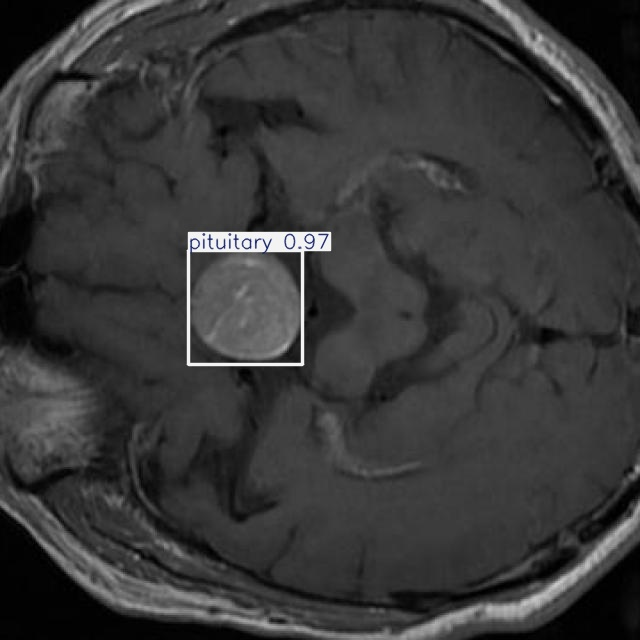

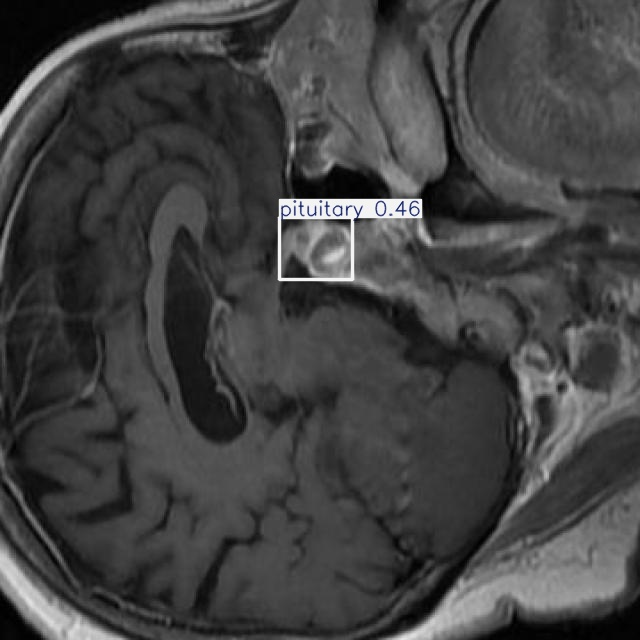

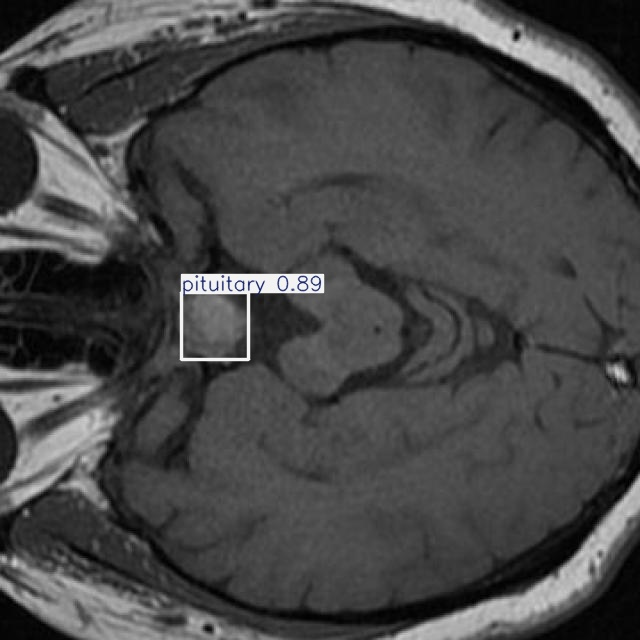

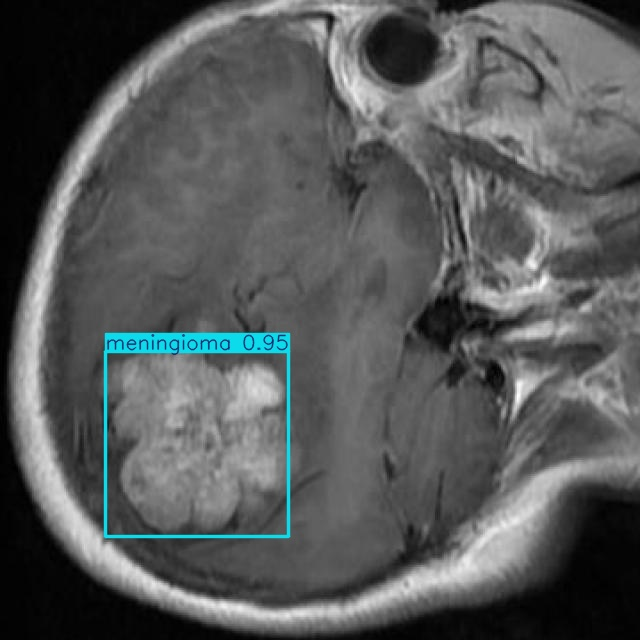

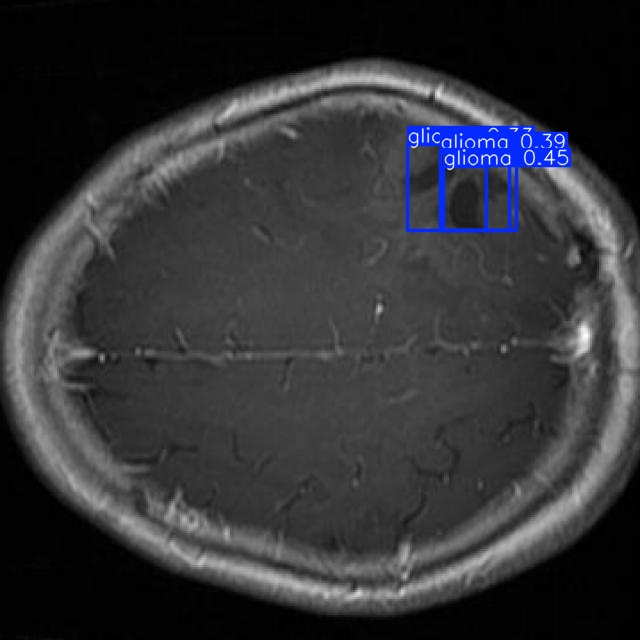

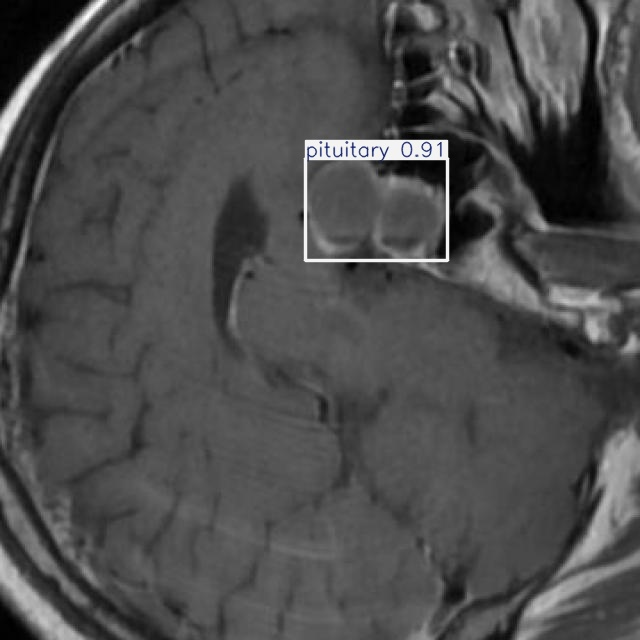

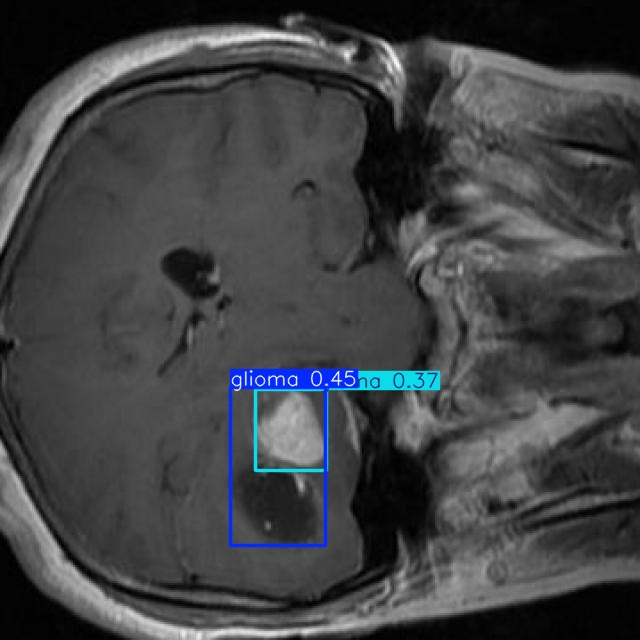

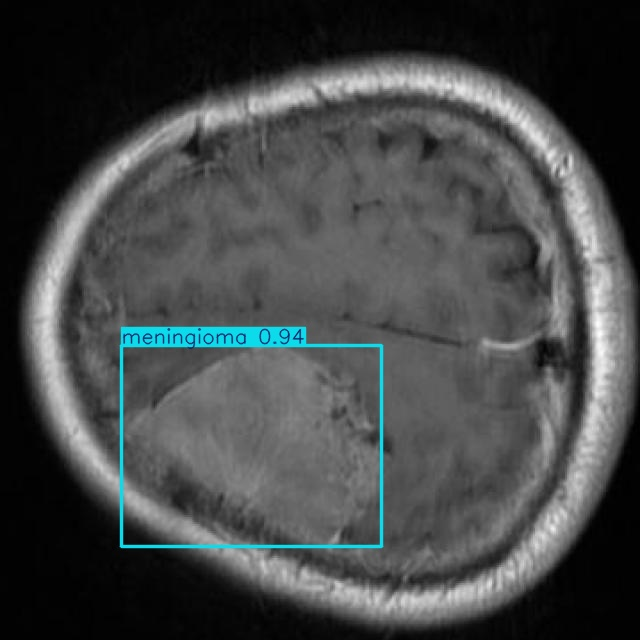

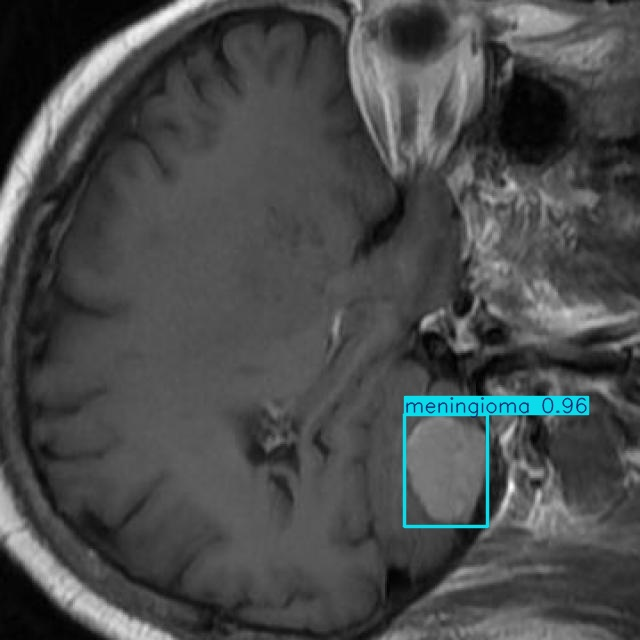

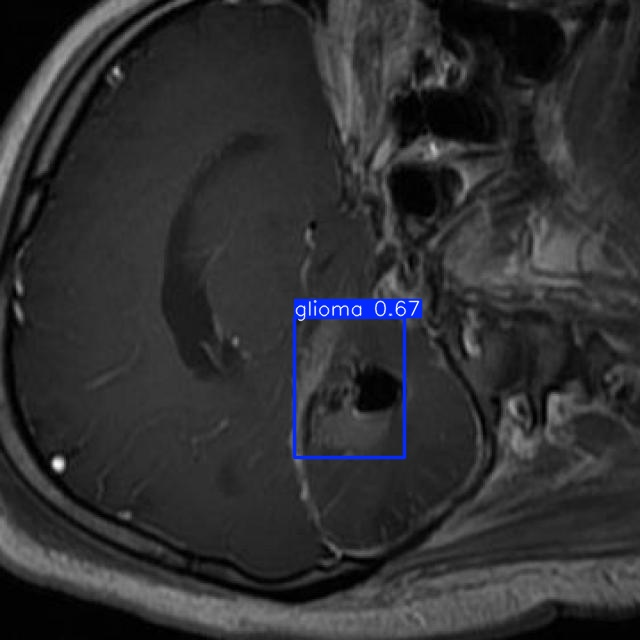

In [9]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

#**Download the model**

In [10]:
!zip -r yolov8_results.zip /content/runs/detect/train


  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/args.yaml (deflated 53%)
  adding: content/runs/detect/train/BoxF1_curve.png (deflated 9%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 12%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 13%)
  adding: content/runs/detect/train/labels.jpg (deflated 34%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 25%)
  adding: content/runs/detect/train/confusion_matrix.png (deflated 29%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 6%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 8%)
  adding: content/runs/detect/train/BoxP_curve.png (deflated 10%)
  adding: content/runs/detect/train/BoxPR_curve.png (deflated 13%)
  adding: content/runs/detect/train/val_batch2_pred.jpg (deflated 12%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 13%)
  adding: content/runs/detect/train/train_batch0.jpg

In [11]:
from google.colab import files
files.download("yolov8_results.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>